In [1]:
import pandas as pd
import os, sys
import numpy as np

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../../..')))

from utils.prediction_utils import *

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb

random_seed = 42

In [3]:
base_dir = "/Users/andrew/Desktop/Harvard/idreos-research/gpu_profiling"
X, y = get_data("sdpa", base_dir, sample_rate=1.0)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142464 entries, 0 to 142463
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   b                  142464 non-null  int64  
 1   h                  142464 non-null  int64  
 2   s_q                142464 non-null  int64  
 3   s_kv               142464 non-null  int64  
 4   d_qk               142464 non-null  int64  
 5   d_v                142464 non-null  int64  
 6   gflops             142464 non-null  float64
 7   dtype_16           142464 non-null  bool   
 8   dtype_32           142464 non-null  bool   
 9   dtype_b16          142464 non-null  bool   
 10  backend_efficient  142464 non-null  bool   
 11  backend_flash      142464 non-null  bool   
 12  is_causal_0        142464 non-null  bool   
 13  is_causal_1        142464 non-null  bool   
dtypes: bool(7), float64(1), int64(6)
memory usage: 8.6 MB


# Train-Test-Split

In [4]:
X_train, X_val, X_test, y_train, y_val, y_test = get_train_test_split(X, y, return_concat=False)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99724 entries, 63364 to 121958
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   b                  99724 non-null  int64  
 1   h                  99724 non-null  int64  
 2   s_q                99724 non-null  int64  
 3   s_kv               99724 non-null  int64  
 4   d_qk               99724 non-null  int64  
 5   d_v                99724 non-null  int64  
 6   gflops             99724 non-null  float64
 7   dtype_16           99724 non-null  bool   
 8   dtype_32           99724 non-null  bool   
 9   dtype_b16          99724 non-null  bool   
 10  backend_efficient  99724 non-null  bool   
 11  backend_flash      99724 non-null  bool   
 12  is_causal_0        99724 non-null  bool   
 13  is_causal_1        99724 non-null  bool   
dtypes: bool(7), float64(1), int64(6)
memory usage: 6.8 MB


# Fitting

## Decision Tree

In [12]:
tree_model = DecisionTreeRegressor(max_depth=10, random_state=random_seed)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

Train--------
Mean Squared Error: 0.006325913350905472
R-squared: 0.9964989628911014


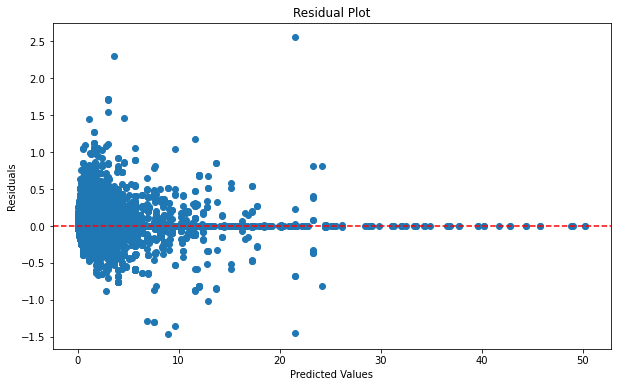

Val--------
Mean Squared Error: 0.027429735160153356
R-squared: 0.9838162888373233


In [13]:
y_hat_train = tree_model.predict(X_train)
y_hat_val = tree_model.predict(X_val)

print("Train--------")
get_r2_score(y_train, y_hat_train)
plot_residuals(y_train, y_hat_train)

print("Val--------")
_ = get_r2_score(y_val, y_hat_val)

# plot_residuals(y_val, y_hat_val)

In [14]:
feature_importances = tree_model.feature_importances_

# Create a DataFrame to view the features and their importance scores
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})


features_df = features_df.sort_values(by='Importance', ascending=False)
print(features_df)

              Feature    Importance
6              gflops  8.933867e-01
13        is_causal_1  3.233726e-02
8            dtype_32  3.213364e-02
12        is_causal_0  2.649641e-02
5                 d_v  4.898676e-03
4                d_qk  3.346850e-03
3                s_kv  3.332886e-03
2                 s_q  2.220727e-03
10  backend_efficient  6.972007e-04
0                   b  5.852446e-04
11      backend_flash  2.693088e-04
1                   h  2.687515e-04
9           dtype_b16  2.548964e-05
7            dtype_16  8.835068e-07
